About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Interesting Task Ideas

Understanding what content is available in different countries

Network analysis of Actors / Directors and find interesting insights

Does Netflix has more focus on TV Shows than movies in recent years.

SOLUTION

APPROCH TO FOLLOW:

Importing necessary Libraries

Basic opeartions

Finding Correlation

Dealing with Null values and Duplicates

Performing Exploratory Data Analysis

Drawing Insights


IMPORTING ESSENTIAL LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob

IMPORTING FILE PATH

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
netflix =pd.read_csv('/content/drive/MyDrive/Netflix.csv (1).zip')

BASIC OPERATIONS

In [5]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [7]:
netflix.shape

(6234, 12)

In [8]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [10]:
netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [11]:
netflix.isnull().sum()
netflix.dropna(how='any', inplace=True)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [12]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
netflix.duplicated().sum()

0

CORRELATION OF DATASET

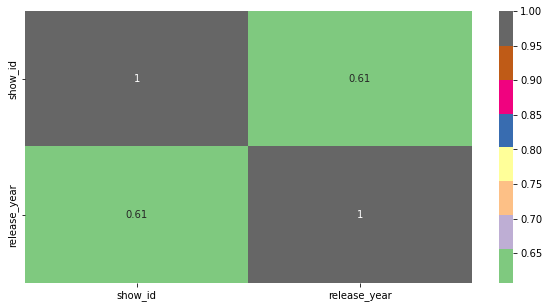

In [14]:
corr = netflix.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap= 'Accent',annot=True)

Let's have a look at ratings

In [15]:
 netflix['rating'].value_counts()

TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: rating, dtype: int64

In [16]:
barChart=px.bar(netflix,x='rating', color = 'rating', title='Count of Ratings by Movie and TV Shows')
barChart.update_traces(dict(marker_line_width=0))
barChart.show()

Que 1 - Which country has highest content?

In [17]:
netflix['country'].value_counts()

United States                  1323
India                           707
United Kingdom                  152
Canada                           78
Spain                            72
                               ... 
South Korea, Czech Republic       1
Spain, France, Uruguay            1
Chile, Argentina                  1
Czech Republic, Slovakia          1
United Kingdom, Russia            1
Name: country, Length: 433, dtype: int64

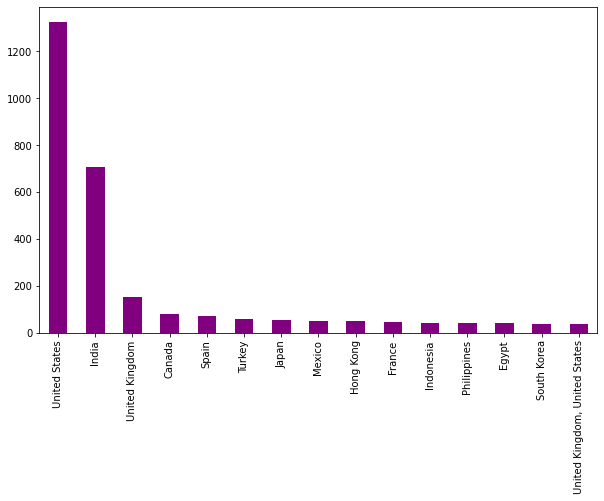

In [18]:
plt.figure(figsize=(10,6))
countries = netflix['country'].value_counts().head(15)
countries.plot(kind='bar',color = 'purple')

Que 2 - What type of content is mostly preferred? 

In [19]:
netflix['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

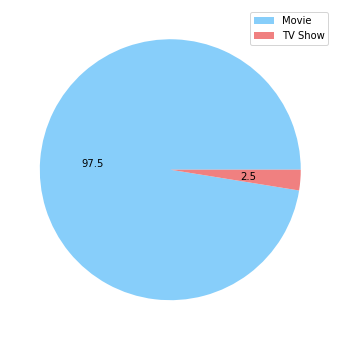

In [20]:
plt.figure(figsize=(10,6))
plt.pie(netflix.type.value_counts(), labels = netflix.type.value_counts().index, labeldistance=None, autopct="%.1f",colors=['lightskyblue', 'lightcoral'])
plt.legend()
plt.show()


Que 3 - Which content is most prefered in all given years

In [21]:
last_years = netflix[["type","release_year"]]

In [22]:
last_years=last_years[last_years["release_year"] >= 2012]

In [23]:
last_years.release_year.value_counts().sort_index()

2012    117
2013    155
2014    196
2015    324
2016    514
2017    585
2018    537
2019    326
2020      6
Name: release_year, dtype: int64

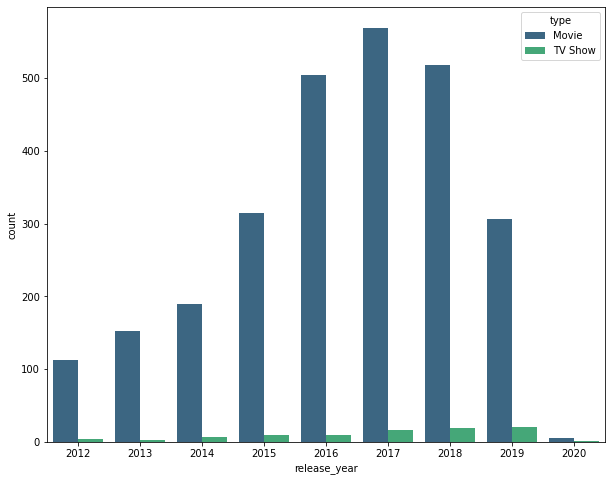

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x="release_year", data=last_years, hue="type", palette="viridis")

Network analysis of Actors / Directors and find interesting insights

In [25]:
netflix['director'] = netflix['director'].str.split(',')



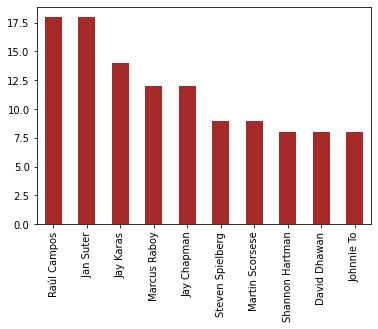

In [26]:
netflix.explode('director')['director'].value_counts()[:10].plot(kind='bar' , color = 'brown')

In [27]:
netflix['cast'] = netflix['cast'].str.split(',')

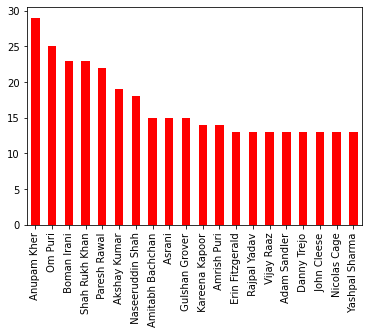

In [28]:
netflix.explode('cast')['cast'].value_counts()[:20].plot(kind='bar' , color = 'red')


CONCLUSION :

There are 6234 rows and 12 columns in dataset.

We have dropped null values in dataset.

TV-MA has highest ratings followed by TV-14 and R.

USA has highest content available followed by India , UK , Canada , spain , Turkey any so on.

Movie type of content is more preferred as compared to TV Shows.

In year 2017 most number of movies are released and in year 2019 most number of TV shows are released.

Raul and Jan suter are top directors followed by Jay Karas , Marcus Raboy , Jay Chapman

Anupam Kher is the top most actor followed by Om puri , Boman Irani , SRK , Paresh Rawal and so on.